1- Gerekli Kütüphaneleri İçe Aktarma

In [218]:
# Kütüphaneleri içe aktarma
import pandas as pd # veri aktarma
import numpy as np # array islemi
import warnings # uyarı
from sklearn.impute import KNNImputer # kumeleme ile eksik verileri doldurma
from datetime import datetime # datetime formatına cevirme
import matplotlib.pyplot as plt # gorsellestirme
import seaborn as sns # gorsellestirme
from sklearn.preprocessing import StandardScaler # ölçeklendirme
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split # veriyi train ve test olarak ayırma
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score

In [219]:
# uyarıları gizleme
warnings.filterwarnings('ignore') 

In [220]:
# Tüm satırları göstermek için
pd.set_option('display.max_rows', None)

# Tüm sütunları göstermek için
pd.set_option('display.max_columns', None)

# Belirli bir genişlikte gösterim için
pd.set_option('display.width', None)

2- Veriyi Alma

In [221]:
# Veriyi alma ve görme
side_effect_df= pd.read_excel("Data/side_effect_data.xlsx")
side_effect_df.head()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


3- Veriyi Keşfetme ve İnceleme

In [222]:
# satır, sütun sayısını görme
side_effect_df.shape

(2357, 19)

In [223]:
# Veri türlerini görüntüleme
print(side_effect_df.dtypes)

Kullanici_id                                 int64
Cinsiyet                                    object
Dogum_Tarihi                        datetime64[ns]
Uyruk                                       object
Il                                          object
Ilac_Adi                                    object
Ilac_Baslangic_Tarihi               datetime64[ns]
Ilac_Bitis_Tarihi                   datetime64[ns]
Yan_Etki                                    object
Yan_Etki_Bildirim_Tarihi            datetime64[ns]
Alerjilerim                                 object
Kronik Hastaliklarim                        object
Baba Kronik Hastaliklari                    object
Anne Kronik Hastaliklari                    object
Kiz Kardes Kronik Hastaliklari              object
Erkek Kardes Kronik Hastaliklari            object
Kan Grubu                                   object
Kilo                                       float64
Boy                                        float64
dtype: object


In [224]:
#Kolon isimlerinin düzeltilmesi
side_effect_df.columns = [
    "Kullanici_Id",
    "Cinsiyet",
    "Dogum_Tarihi",
    "Uyruk",
    "Il", 
    "Ilac_Adi",
    "Ilac_Baslangic_Tarihi",
    "Ilac_Bitis_Tarihi",
    "Yan_Etki",
    "Yan_Etki_Bildirim_Tarihi",
    "Alerjilerim",
    "Kronik_Hastaliklarim",
    "Baba_Kronik_Hastaliklari",
    "Anne_Kronik_Hastaliklari",
    "Kiz_Kardes_Kronik_Hastaliklari",
    "Erkek_Kardes_Kronik_Hastaliklari",
    "Kan_Grubu",
    "Kilo",
    "Boy"
]

Kronik_Hastaliklarim, Baba_Kronik_Hastaliklari, Anne_Kronik_Hastaliklari, Kiz_Kardes_Kronik_Hastaliklari, Erkek_Kardes_Kronik_Hastaliklari ve Ilac_Adi kolonlarında birden fazla değer olması veri analizinde sorun yaratabilir bu sorunlar;
- Analiz Kolaylığı
- Modelleme
- Görselleştirme olabilmektedir. 
Bu nedenle verilerin tek satır halinen getirlmesi gerekir.

In [225]:
def explode_column(df, column_name): 
    df = df.copy()
    df[column_name] = df[column_name].fillna('') # NaN değerleri boş string ile doldurma
    df[column_name] = df[column_name].apply(lambda x: x.split(", ") if x else [])
    return df.explode(column_name)

In [226]:
# Kolonu ayırma
baba_kronik_hastaliklari_df = explode_column(side_effect_df, 'Baba_Kronik_Hastaliklari')
anne_kronik_hastaliklari_df = explode_column(baba_kronik_hastaliklari_df, 'Anne_Kronik_Hastaliklari')
kiz_kardes_kronik_hastaliklari_df = explode_column(anne_kronik_hastaliklari_df, 'Kiz_Kardes_Kronik_Hastaliklari')
erkek_kardes_kronik_hastaliklari_df = explode_column(kiz_kardes_kronik_hastaliklari_df, 'Erkek_Kardes_Kronik_Hastaliklari')
# son olarak Kronik_Hastaliklarim kolonu
side_effect_df = explode_column(erkek_kardes_kronik_hastaliklari_df, 'Kronik_Hastaliklarim')

In [227]:
# Ilac_Adi kolonununda 147 benzersiz verisi olduğu için bu işlemin yapılması gereklidir
side_effect_df = explode_column(side_effect_df, 'Ilac_Adi')

In [228]:
side_effect_df.head()

,Kullanici_Id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik_Hastaliklarim,Baba_Kronik_Hastaliklari,Anne_Kronik_Hastaliklari,Kiz_Kardes_Kronik_Hastaliklari,Erkek_Kardes_Kronik_Hastaliklari,Kan_Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,Hipertansiyon,Guatr,KOAH,Kemik Erimesi,Kemik Erimesi,B RH-,103.0,191.0
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,Kan Hastaliklari,Guatr,KOAH,Kemik Erimesi,Kemik Erimesi,B RH-,103.0,191.0
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,Hipertansiyon,Guatr,KOAH,Kemik Erimesi,Guatr,B RH-,103.0,191.0
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,Kan Hastaliklari,Guatr,KOAH,Kemik Erimesi,Guatr,B RH-,103.0,191.0
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,Hipertansiyon,Guatr,KOAH,Kalp Hastaliklari,Kemik Erimesi,B RH-,103.0,191.0


In [229]:
# ayırma işleminden sonra; satır, sutun sayısı
side_effect_df.shape

(40820, 19)

4- Veri Ön İşleme
    - Veriyi temizleme ve düzenleme
    - Eksik veya anlamsız verileri görme

In [230]:
# Kolonlarda Boş ve NoN değerlerin sayısını görme
side_effect_df.isna().sum()

Kullanici_Id                            0
Cinsiyet                            14080
Dogum_Tarihi                            0
Uyruk                                   0
Il                                   3340
Ilac_Adi                                0
Ilac_Baslangic_Tarihi                   0
Ilac_Bitis_Tarihi                       0
Yan_Etki                                0
Yan_Etki_Bildirim_Tarihi                0
Alerjilerim                          7916
Kronik_Hastaliklarim                 3952
Baba_Kronik_Hastaliklari             1320
Anne_Kronik_Hastaliklari             2016
Kiz_Kardes_Kronik_Hastaliklari        876
Erkek_Kardes_Kronik_Hastaliklari     1196
Kan_Grubu                            6240
Kilo                                 4628
Boy                                  2016
dtype: int64

In [231]:
# Cinsiyet, Alerjilerim, Il, Kan_Grubu, Kronik_Hastaliklarim ve Aile Kronik hastalıkları bilgilerin içeren kolonlarındaki eksik verileri silme
side_effect_df = side_effect_df.dropna(subset=['Cinsiyet', 'Alerjilerim', 'Il', 'Kan_Grubu', 'Kronik_Hastaliklarim', 'Baba_Kronik_Hastaliklari', 'Anne_Kronik_Hastaliklari', 'Kiz_Kardes_Kronik_Hastaliklari', 'Erkek_Kardes_Kronik_Hastaliklari' ])

In [232]:
#Kilo ve Boy için mode ile doldurma
side_effect_df['Kilo'].fillna(side_effect_df['Kilo'].mode(), inplace=True)
side_effect_df['Boy'].fillna(side_effect_df['Boy'].mode(), inplace=True)

In [233]:
side_effect_df.isna().sum()

Kullanici_Id                           0
Cinsiyet                               0
Dogum_Tarihi                           0
Uyruk                                  0
Il                                     0
Ilac_Adi                               0
Ilac_Baslangic_Tarihi                  0
Ilac_Bitis_Tarihi                      0
Yan_Etki                               0
Yan_Etki_Bildirim_Tarihi               0
Alerjilerim                            0
Kronik_Hastaliklarim                   0
Baba_Kronik_Hastaliklari               0
Anne_Kronik_Hastaliklari               0
Kiz_Kardes_Kronik_Hastaliklari         0
Erkek_Kardes_Kronik_Hastaliklari       0
Kan_Grubu                              0
Kilo                                1432
Boy                                  472
dtype: int64

In [234]:
# Kümeleme algoritmaları kullanarak benzer özelliklere sahip verileri gruplayabilir
# ve eksik verileri bu gruptan tahmin edilebilir.

# Kilo ve Boy özellikleri için KNNImputer kullanma
imputer = KNNImputer(n_neighbors=5)

In [235]:
side_effect_df[['Kilo', 'Boy']] = imputer.fit_transform(side_effect_df[['Kilo', 'Boy']])

In [236]:
# son durumda boş ve NaN değerler kalmamıştır
side_effect_df.isna().sum()

Kullanici_Id                        0
Cinsiyet                            0
Dogum_Tarihi                        0
Uyruk                               0
Il                                  0
Ilac_Adi                            0
Ilac_Baslangic_Tarihi               0
Ilac_Bitis_Tarihi                   0
Yan_Etki                            0
Yan_Etki_Bildirim_Tarihi            0
Alerjilerim                         0
Kronik_Hastaliklarim                0
Baba_Kronik_Hastaliklari            0
Anne_Kronik_Hastaliklari            0
Kiz_Kardes_Kronik_Hastaliklari      0
Erkek_Kardes_Kronik_Hastaliklari    0
Kan_Grubu                           0
Kilo                                0
Boy                                 0
dtype: int64

In [237]:
# Kategorik kolonların belirlenmesi
categorical_columns = side_effect_df.select_dtypes(include=['object', 'category']).columns

In [238]:
categorical_columns

Index(['Cinsiyet', 'Uyruk', 'Il', 'Ilac_Adi', 'Yan_Etki', 'Alerjilerim',
       'Kronik_Hastaliklarim', 'Baba_Kronik_Hastaliklari',
       'Anne_Kronik_Hastaliklari', 'Kiz_Kardes_Kronik_Hastaliklari',
       'Erkek_Kardes_Kronik_Hastaliklari', 'Kan_Grubu'],
      dtype='object')

In [239]:
# Her bir kategorik kolonda kaç tane benzersiz değerin oldugu bilgisi
# Burada yapılacak işlem aslında 
for column in categorical_columns:
    unique_values_count = side_effect_df[column].nunique()
    print(f'{column} kolonunda {unique_values_count} benzersiz kategori var.')

Cinsiyet kolonunda 2 benzersiz kategori var.
Uyruk kolonunda 1 benzersiz kategori var.
Il kolonunda 13 benzersiz kategori var.
Ilac_Adi kolonunda 158 benzersiz kategori var.
Yan_Etki kolonunda 22 benzersiz kategori var.
Alerjilerim kolonunda 23 benzersiz kategori var.
Kronik_Hastaliklarim kolonunda 11 benzersiz kategori var.
Baba_Kronik_Hastaliklari kolonunda 11 benzersiz kategori var.
Anne_Kronik_Hastaliklari kolonunda 12 benzersiz kategori var.
Kiz_Kardes_Kronik_Hastaliklari kolonunda 12 benzersiz kategori var.
Erkek_Kardes_Kronik_Hastaliklari kolonunda 12 benzersiz kategori var.
Kan_Grubu kolonunda 8 benzersiz kategori var.


In [240]:
# Uyruk kolonunda sadece 'Türkiye' verisi vardır. Modelin performanısını ya da analiz sonuçlarını etkilemeyeceğini için bu kolon çıkartıldı.
side_effect_df.drop(columns=['Uyruk'], inplace=True)

In [241]:
# Doğum_Tarihi kolonunu datetime formatına çevirme
side_effect_df['Dogum_Tarihi'] = pd.to_datetime(side_effect_df['Dogum_Tarihi'], format='%Y-%m-%d')

# Bugünkü tarihi alma
today = datetime.today()

# Yaş kolonunu hesapla
side_effect_df['Yas'] = side_effect_df['Dogum_Tarihi'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))

# Sonuçları görmek için ilk 5 satırı göster
side_effect_df[['Dogum_Tarihi', 'Yas']].head()

,Dogum_Tarihi,Yas
0,1960-03-01,64
0,1960-03-01,64
0,1960-03-01,64
0,1960-03-01,64
0,1960-03-01,64


In [242]:
# Dogum_Tarihi kolonunun silinmesi
side_effect_df.drop(columns=['Dogum_Tarihi'], inplace=True)

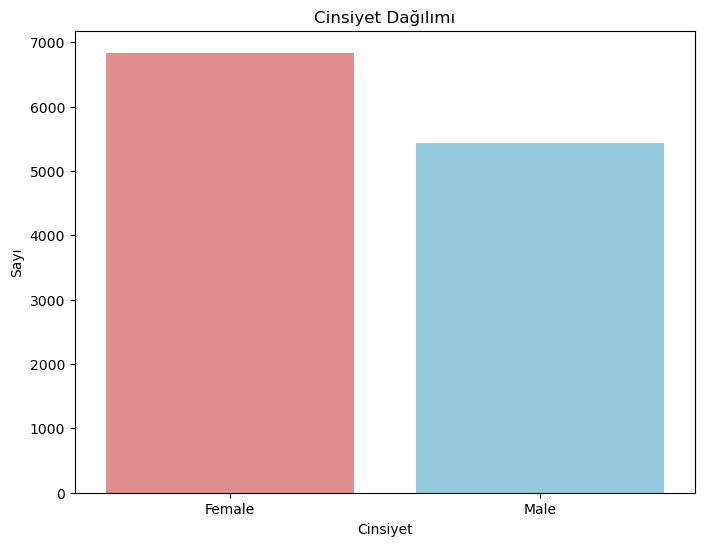

In [243]:
# Cinsiyet dağılımını görselleştirme
custom_palette = {'Male': 'skyblue', 'Female': 'lightcoral'}
plt.figure(figsize=(8, 6))
sns.countplot(x = 'Cinsiyet', data = side_effect_df, order = side_effect_df['Cinsiyet'].value_counts().index, palette = custom_palette)
plt.title('Cinsiyet Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Sayı')
plt.show()

5- Veri Görselleştirme

In [244]:
print(side_effect_df['Yan_Etki'].unique())

['Kabizlik' 'Carpinti' 'Istah Artisi' 'Terleme' 'Gucsuzluk' 'Karin Agrisi'
 'Gec Bosalma' 'Ishal' 'Tansiyon Yukselme' 'Az Uyuma' 'Tansiyon Dusuklugu'
 'Gormede Bulaniklik' 'Yorgunluk' 'Mide Bulantisi' 'Uykululuk Hali'
 'Bulanti' 'Agizda Farkli Bir Tat' 'Huzursuzluk' 'Deride Morarma'
 'Sinirlilik' 'Bas Agrisi' 'Kas Agrisi']


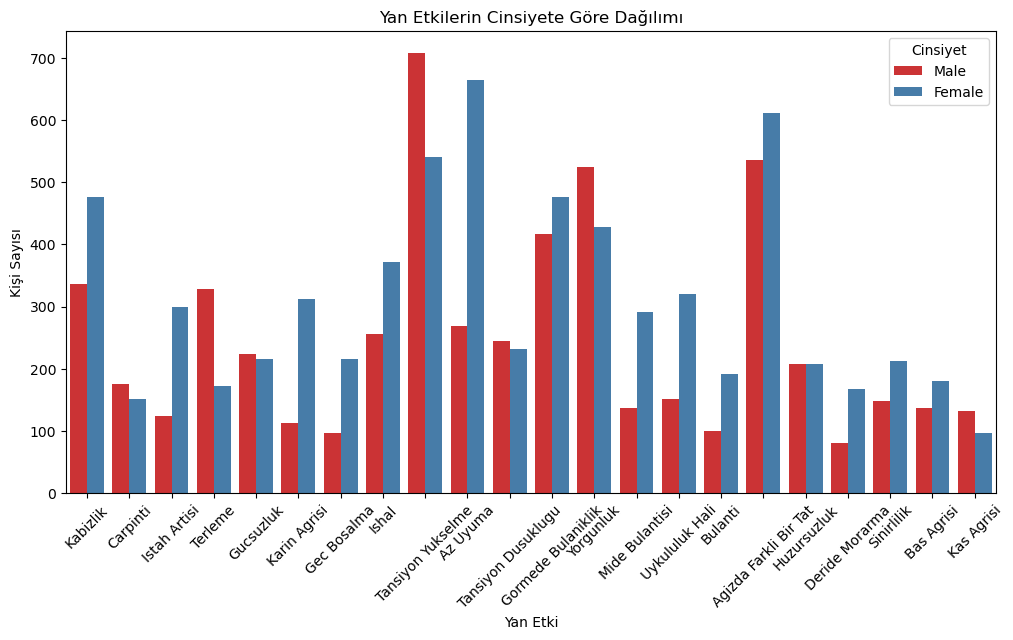

In [245]:
# Yan Etkilerin Cinsiyet faktöriyle ilişkisi
plt.figure(figsize=(12, 6))
sns.countplot(data=side_effect_df, x='Yan_Etki', hue='Cinsiyet', palette='Set1')
plt.title('Yan Etkilerin Cinsiyete Göre Dağılımı')
plt.xlabel('Yan Etki')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=45)
plt.legend(title='Cinsiyet')
plt.show()

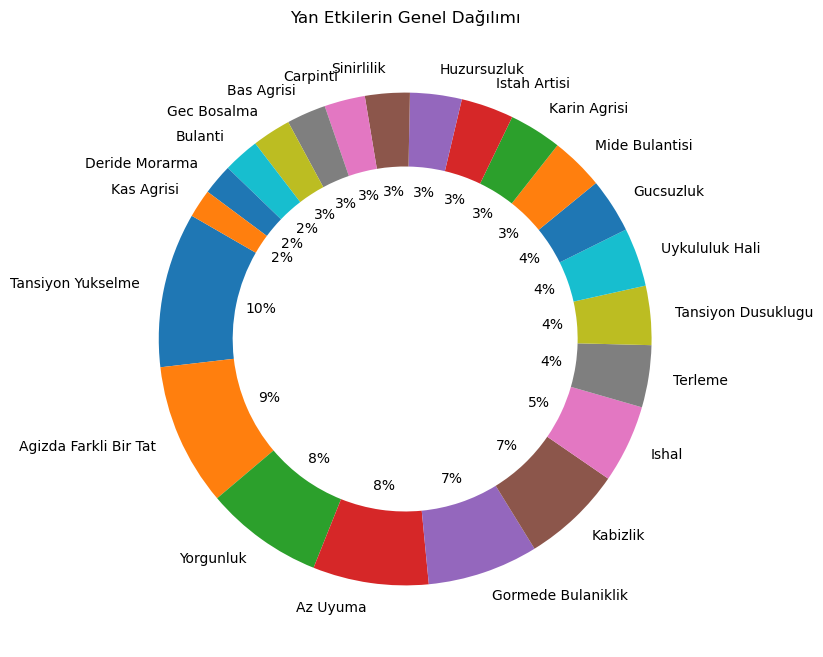

In [246]:
# Yan etkilerin sayısı
yan_etki_toplam = side_effect_df['Yan_Etki'].value_counts()

# Doughnut grafiği oluşturma
plt.figure(figsize=(8, 8))
plt.pie(yan_etki_toplam, labels=yan_etki_toplam.index, autopct='%1.f%%', startangle=150, wedgeprops=dict(width=0.3))
plt.title('Yan Etkilerin Genel Dağılımı')
plt.show()

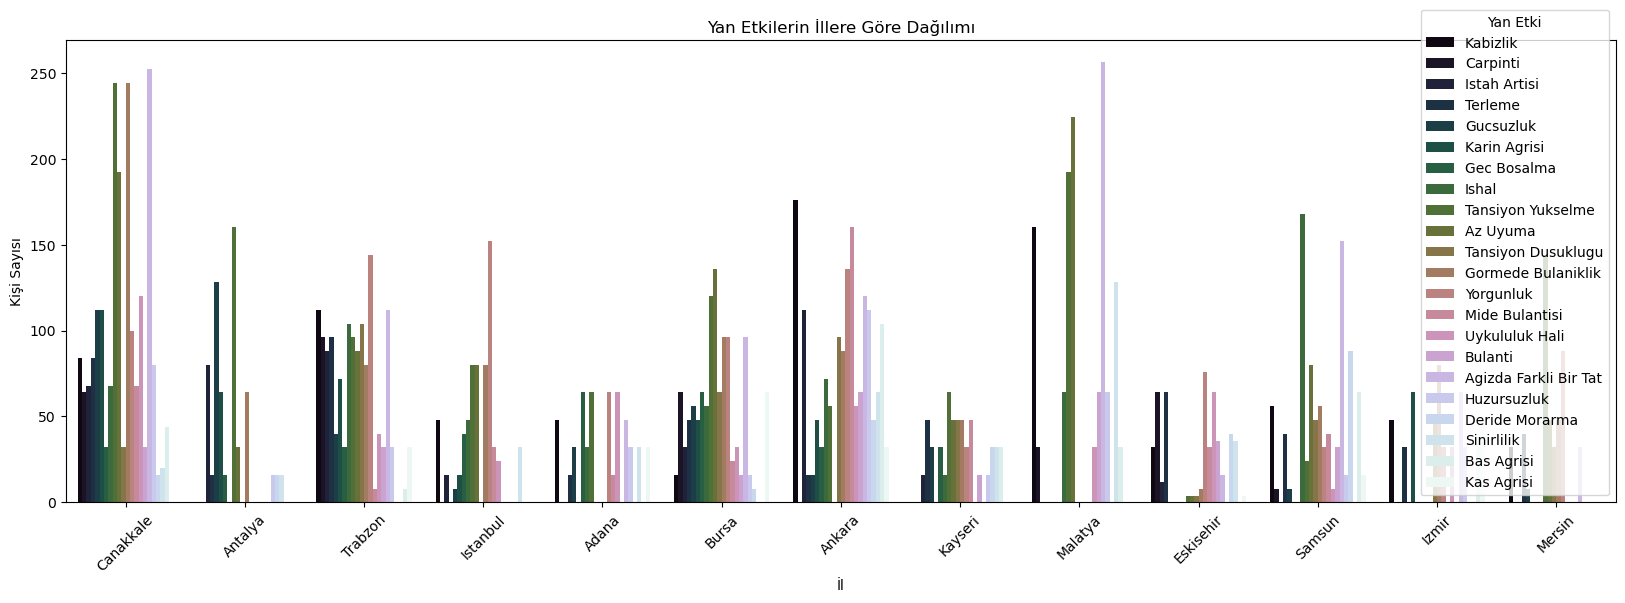

In [247]:
# Yan etkilerin hangi illerde daha sık görüldüğü
plt.figure(figsize=(20, 6))
sns.countplot(data=side_effect_df, x='Il', hue='Yan_Etki', palette='cubehelix')
plt.title('Yan Etkilerin İllere Göre Dağılımı')
plt.xlabel('İl')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=45)
plt.legend(title='Yan Etki')
plt.show()

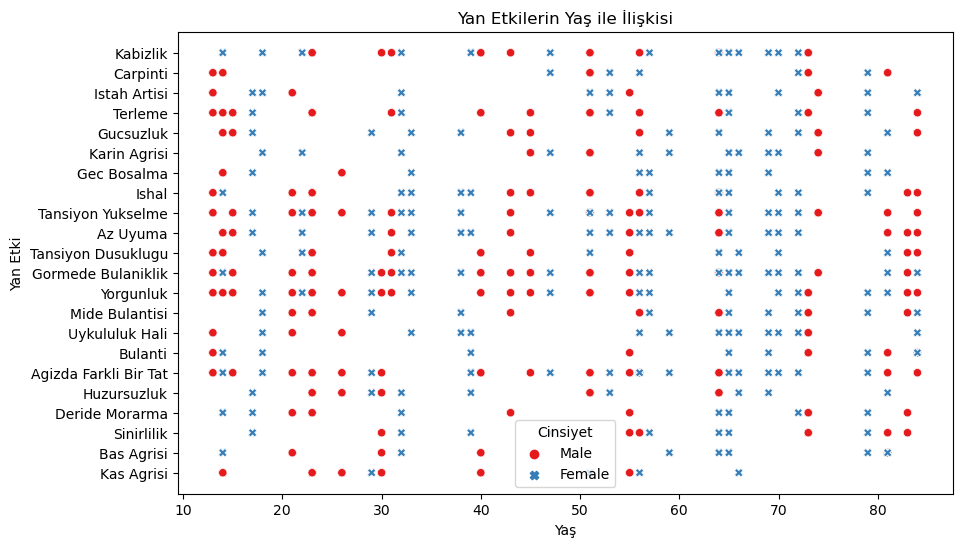

In [248]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=side_effect_df, x='Yas', y='Yan_Etki', hue='Cinsiyet', style='Cinsiyet', palette='Set1')
plt.title('Yan Etkilerin Yaş ile İlişkisi')
plt.xlabel('Yaş')
plt.ylabel('Yan Etki')
plt.show()

Yan Etkilerin Yaş ile ilişkisi incelendiğinde 40-45 yaş arasındaki erkeklerde Görmede Bulanıklık ve Yorgunluk daha çok görülmektedir. 65 yaş üstü kadınlarda belirtilen çoğu yan etki görülmektedir.

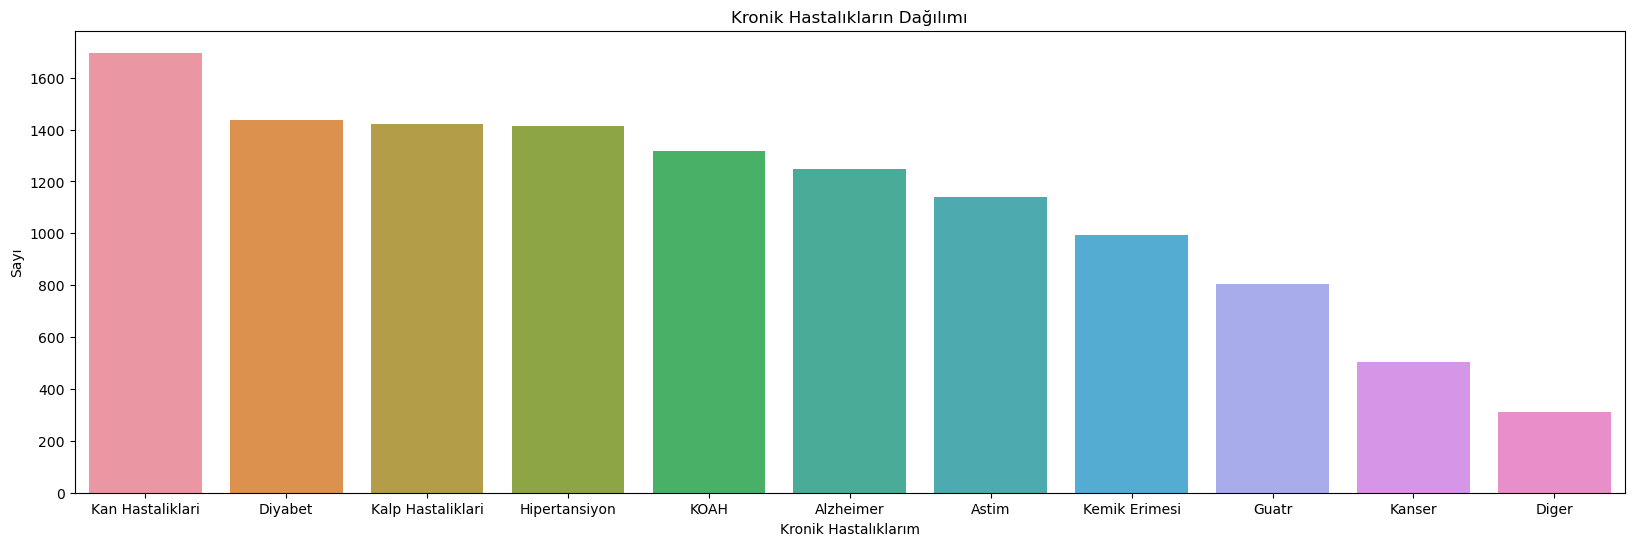

In [249]:
# Kronik hastalıkların dağılımını görselleştirme
plt.figure(figsize=(20, 6))
sns.countplot(x='Kronik_Hastaliklarim', data=side_effect_df, order=side_effect_df['Kronik_Hastaliklarim'].value_counts().index)
plt.title('Kronik Hastalıkların Dağılımı')
plt.xlabel('Kronik Hastalıklarım')
plt.ylabel('Sayı')
plt.show()

In [250]:
# Yaş aralıklarına göre gruplama
side_effect_df['Yas_Grubu'] = pd.cut(side_effect_df['Yas'], bins=[0, 18, 30, 40, 50, 60, 70, 80, 100], labels=['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+'])

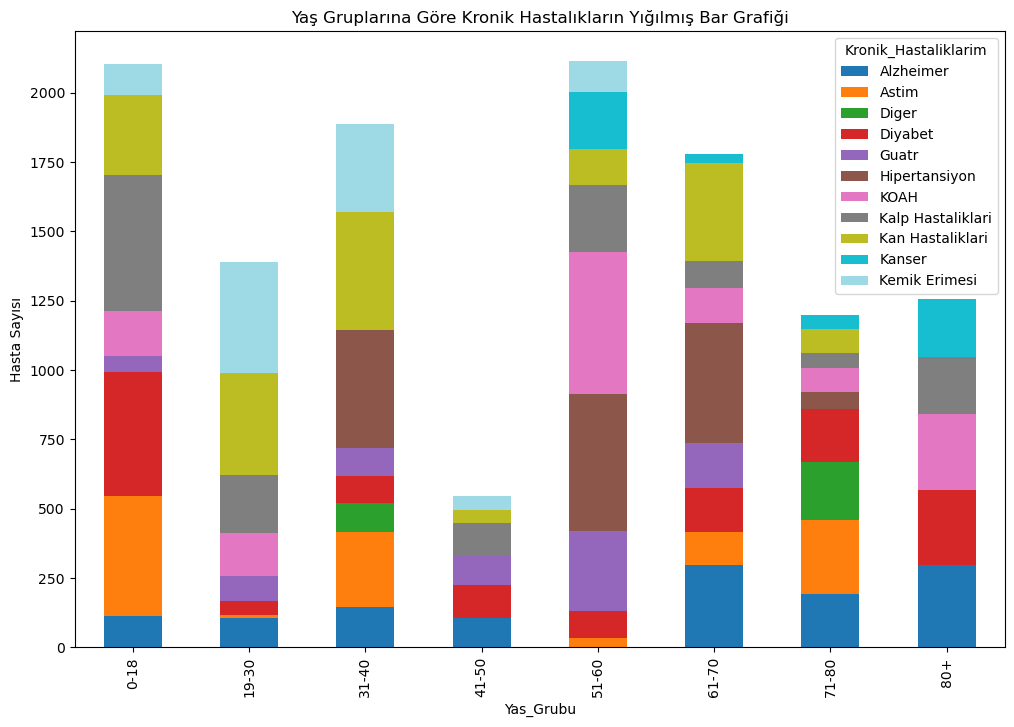

In [251]:
# Yaş grubu ve kronik hastalıkları pivot tabloya çevirme
pivot_data = side_effect_df.pivot_table(index='Yas_Grubu', columns='Kronik_Hastaliklarim', aggfunc='size', fill_value=0)

# Yığılmış bar grafiği
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8), cmap="tab20")
plt.title('Yaş Gruplarına Göre Kronik Hastalıkların Yığılmış Bar Grafiği')
plt.ylabel('Hasta Sayısı')
plt.xticks(rotation = 90)
plt.show()

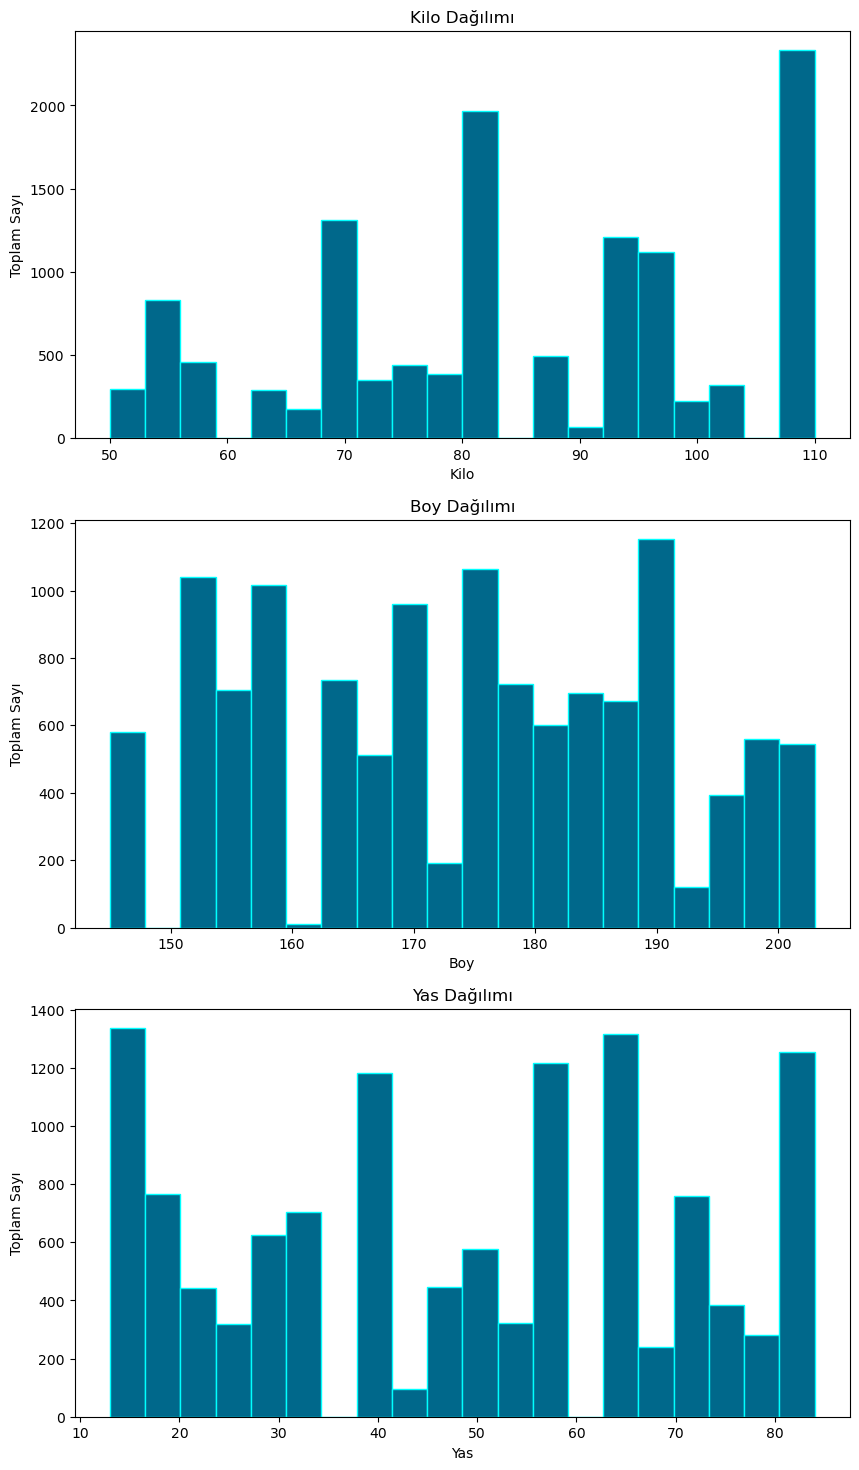

In [252]:
# İlgilenilen sütunlar
selected_columns = ['Kilo', 'Boy', 'Yas' ]

# Seçilen sütunların histogram çizimi
fig, axes = plt.subplots(nrows=len(selected_columns), figsize=(10, 6 * len(selected_columns)))

for i, column in enumerate(selected_columns):
    axes[i].hist(side_effect_df[column], bins=20, color='#00688b', ec='#00ffff')
    axes[i].set_title(f'{column} Dağılımı')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Toplam Sayı')
plt.show()

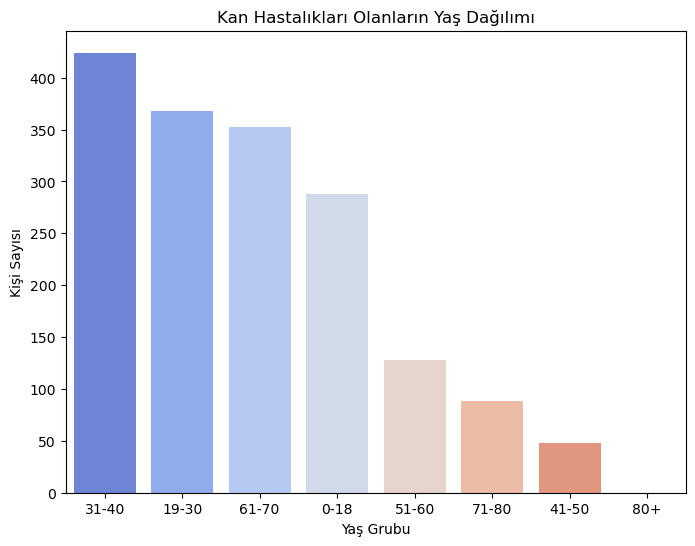

In [253]:
# "Kan Hastalıkları" en çok hangi yaş grubunda olduğu bilgisi
kan_hastaligi_olanlar = side_effect_df[side_effect_df['Kronik_Hastaliklarim'].str.contains('Kan Hastaliklari', na=False)]

# Filtrelenmiş veriyi yaş gruplarına göre inceleme
plt.figure(figsize=(8, 6))
sns.countplot(x='Yas_Grubu', data=kan_hastaligi_olanlar, order=kan_hastaligi_olanlar['Yas_Grubu'].value_counts().index, palette='coolwarm')
plt.title('Kan Hastalıkları Olanların Yaş Dağılımı')
plt.xlabel('Yaş Grubu')
plt.ylabel('Kişi Sayısı')
plt.show()

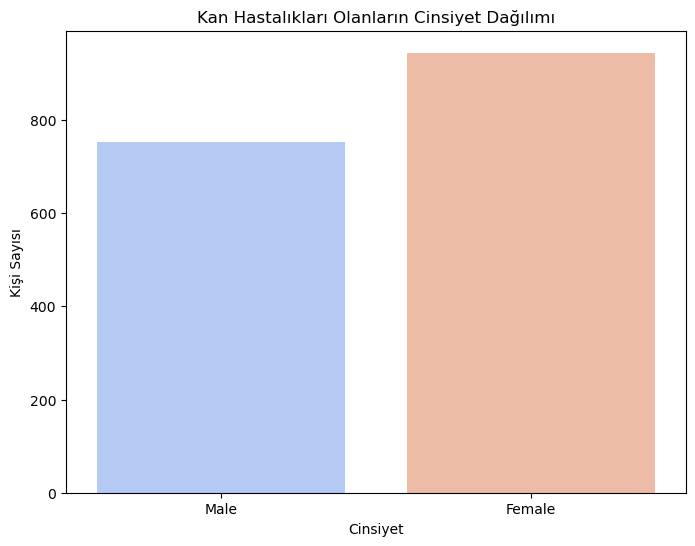

In [254]:
# Cinsiyete göre dağılımı hesaplama
plt.figure(figsize=(8, 6))
sns.countplot(x='Cinsiyet', data=kan_hastaligi_olanlar, palette='coolwarm')
plt.title('Kan Hastalıkları Olanların Cinsiyet Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Kişi Sayısı')
plt.show()

Kan Hastalıkları en çok 31-40 yaş aralığında ve bayanlarda görüldüğü belirlenmiştir.

In [255]:
# Tedavi süresinin hesaplanması
# İlaç başlangıç ve bitiş tarihleri arasındaki süreyi hesaplayarak, tedavi süresi elde edilebilir. Bu süre, yan etkilerin süresiyle karşılaştırıldığında önemli olabilir.

# Tarihleri datetime formatına çevirme
side_effect_df['Ilac_Baslangic_Tarihi'] = pd.to_datetime(side_effect_df['Ilac_Baslangic_Tarihi'])
side_effect_df['Ilac_Bitis_Tarihi'] = pd.to_datetime(side_effect_df['Ilac_Bitis_Tarihi'])
side_effect_df['Yan_Etki_Bildirim_Tarihi'] = pd.to_datetime(side_effect_df['Yan_Etki_Bildirim_Tarihi'])

# Tedavi süresini gün olarak hesaplama
side_effect_df['Tedavi_Suresi'] = (side_effect_df['Ilac_Bitis_Tarihi'] - side_effect_df['Ilac_Baslangic_Tarihi']).dt.days

# Yan Etki Bildirim Süresini gün olarak hesaplama
side_effect_df['Yan_Etki_Bildirim_Suresi'] = (side_effect_df['Yan_Etki_Bildirim_Tarihi'] - side_effect_df['Ilac_Bitis_Tarihi']).dt.days

# Tekrar eden kayıtları kaldırma
# Burada, tekrarlayan kayıtları 'Kullanici_Id', 'Ilac_Baslangic_Tarihi', 'Ilac_Bitis_Tarihi' ve 'Yan_Etki_Bildirim_Tarihi''ne göre ayarlandi
unique_data = side_effect_df.drop_duplicates(subset=['Kullanici_Id', 'Ilac_Baslangic_Tarihi', 'Ilac_Bitis_Tarihi', 'Yan_Etki_Bildirim_Tarihi'])

# İlk birkaç satırı göster
print(unique_data.head())


    Kullanici_Id Cinsiyet         Il          Ilac_Adi Ilac_Baslangic_Tarihi  \
0            107     Male  Canakkale   trifluoperazine            2022-01-09   
2              2   Female  Canakkale   warfarin sodium            2022-01-11   
18           156   Female    Antalya  selegiline patch            2022-01-05   
19           113     Male    Trabzon        alprazolam            2022-01-12   
27           156   Female    Antalya  selegiline patch            2022-01-06   

   Ilac_Bitis_Tarihi      Yan_Etki Yan_Etki_Bildirim_Tarihi Alerjilerim  \
0         2022-03-04      Kabizlik      2022-02-19 18:28:43       Ceviz   
2         2022-03-12      Carpinti      2022-02-04 05:29:20         Muz   
18        2022-03-19  Istah Artisi      2022-02-17 07:08:01   Karaciger   
19        2022-03-04       Terleme      2022-02-03 00:24:29       Kahve   
27        2022-03-06     Gucsuzluk      2022-02-01 04:34:33   Karaciger   

   Kronik_Hastaliklarim Baba_Kronik_Hastaliklari Anne_Kronik_Hastali

In [256]:
side_effect_df.isna().sum()

Kullanici_Id                        0
Cinsiyet                            0
Il                                  0
Ilac_Adi                            0
Ilac_Baslangic_Tarihi               0
Ilac_Bitis_Tarihi                   0
Yan_Etki                            0
Yan_Etki_Bildirim_Tarihi            0
Alerjilerim                         0
Kronik_Hastaliklarim                0
Baba_Kronik_Hastaliklari            0
Anne_Kronik_Hastaliklari            0
Kiz_Kardes_Kronik_Hastaliklari      0
Erkek_Kardes_Kronik_Hastaliklari    0
Kan_Grubu                           0
Kilo                                0
Boy                                 0
Yas                                 0
Yas_Grubu                           0
Tedavi_Suresi                       0
Yan_Etki_Bildirim_Suresi            0
dtype: int64

In [257]:
# Silinecek kolonlar: Kullanici_Id, Ilac_Baslangic_Tarihi, Ilac_Bitis_Tarihi, Yan_Etki_Bildirim_Tarihi
side_effect_df = side_effect_df.drop(columns=['Kullanici_Id', 'Ilac_Baslangic_Tarihi', 'Ilac_Bitis_Tarihi', 'Yan_Etki_Bildirim_Tarihi' ])

In [258]:
side_effect_df = side_effect_df.drop(columns= ['Yas_Grubu'])

In [259]:
side_effect_df.shape

(12276, 16)

In [260]:
side_effect_df.isna().sum()

Cinsiyet                            0
Il                                  0
Ilac_Adi                            0
Yan_Etki                            0
Alerjilerim                         0
Kronik_Hastaliklarim                0
Baba_Kronik_Hastaliklari            0
Anne_Kronik_Hastaliklari            0
Kiz_Kardes_Kronik_Hastaliklari      0
Erkek_Kardes_Kronik_Hastaliklari    0
Kan_Grubu                           0
Kilo                                0
Boy                                 0
Yas                                 0
Tedavi_Suresi                       0
Yan_Etki_Bildirim_Suresi            0
dtype: int64

In [261]:
# Label Encoding İşlemi
# no-yes şeklinde no:0 yes:1
label_encoder = LabelEncoder()
side_effect_df['Cinsiyet'] = label_encoder.fit_transform(side_effect_df['Cinsiyet'])

In [206]:
# daha iyi bir görünüm için csv dosyanına kaydetme 
unique_data.to_csv('benzersiz_yan_etki.csv', index=False)

6- Verinin Normalize Edilmesi

In [263]:
# Kilo, Boy ve Yas kolonları
features = side_effect_df[['Kilo', 'Boy', 'Yas']]

# Standard Scaler nesnesi
scaler = StandardScaler()

# Verileri ölçeklendirme
scaled_features = scaler.fit_transform(features)

# Ölçeklenmiş verileri yeni bir DataFrame'e dönüştürme
scaled_features_df = pd.DataFrame(scaled_features, columns=['Kilo', 'Boy', 'Yas'])

# Orijinal veri setine ekle
side_effect_df[['Kilo', 'Boy', 'Yas']] = scaled_features_df


Tedavi_Suresi: Tedavi süresi sayısal bir değeri temsil ediyor. Modelde olduğu gibi kullanılabilir. Ancak, Tedavi_Suresi oldukça geniş bir aralığa sahip olabilir, bu nedenle ölçekleme uygulamak mantıklı olacaktır.

Yan_Etki_Bildirim_Suresi: Bu değerin negatif olması model için kafa karıştırıcı olabilir.  Pozitif değerler "tedavi sonrasındaki gün sayısını", negatif değerler ise "tedavi sırasında bildirilme gün sayısını" temsil edebilir.

In [264]:
# Tedavi_Suresi ve Yan_Etki_Bildirim_Suresi'ni ölçekleme işlemi
side_effect_df[['Tedavi_Suresi', 'Yan_Etki_Bildirim_Suresi']] = scaler.fit_transform(
    side_effect_df[['Tedavi_Suresi', 'Yan_Etki_Bildirim_Suresi']]
)

# Yan Etki Bildirim Süresi negatifse 0, pozitifse 1 olarak ayırma
side_effect_df['Yan_Etki_Bildirim_Kategorisi'] = side_effect_df['Yan_Etki_Bildirim_Suresi'].apply(
    lambda x: 0 if x < 0 else 1
)

In [265]:
side_effect_df.head()

,Cinsiyet,Il,Ilac_Adi,Yan_Etki,Alerjilerim,Kronik_Hastaliklarim,Baba_Kronik_Hastaliklari,Anne_Kronik_Hastaliklari,Kiz_Kardes_Kronik_Hastaliklari,Erkek_Kardes_Kronik_Hastaliklari,Kan_Grubu,Kilo,Boy,Yas,Tedavi_Suresi,Yan_Etki_Bildirim_Suresi,Yan_Etki_Bildirim_Kategorisi
0,1,Canakkale,trifluoperazine,Kabizlik,Ceviz,Hipertansiyon,Guatr,KOAH,Kemik Erimesi,Kemik Erimesi,B RH-,1.088557,1.052622,0.715931,-1.355828,2.070377,1
0,1,Canakkale,trifluoperazine,Kabizlik,Ceviz,Kan Hastaliklari,Guatr,KOAH,Kemik Erimesi,Kemik Erimesi,B RH-,1.088557,1.052622,0.715931,-1.355828,2.070377,1
0,1,Canakkale,trifluoperazine,Kabizlik,Ceviz,Hipertansiyon,Guatr,KOAH,Kemik Erimesi,Guatr,B RH-,1.088557,1.052622,0.715931,-1.355828,2.070377,1
0,1,Canakkale,trifluoperazine,Kabizlik,Ceviz,Kan Hastaliklari,Guatr,KOAH,Kemik Erimesi,Guatr,B RH-,1.088557,1.052622,0.715931,-1.355828,2.070377,1
0,1,Canakkale,trifluoperazine,Kabizlik,Ceviz,Hipertansiyon,Guatr,KOAH,Kalp Hastaliklari,Kemik Erimesi,B RH-,1.088557,1.052622,0.715931,-1.355828,2.070377,1


In [269]:
side_effect = side_effect_df.copy()

In [270]:
# One-Hot Encoding uygulamak
one_hot_columns = ['Il', 'Ilac_Adi', 'Alerjilerim', 'Kronik_Hastaliklarim',
                   'Baba_Kronik_Hastaliklari', 'Anne_Kronik_Hastaliklari', 
                   'Kiz_Kardes_Kronik_Hastaliklari', 'Erkek_Kardes_Kronik_Hastaliklari', 
                   'Kan_Grubu']

In [271]:
# Çoklu değerleri ayırma fonksiyonu
def split_column(col):
    return col.str.get_dummies(sep=', ')

In [272]:

# Her kolon için çoklu değerleri ayırma ve One-Hot Encoding uygulama
for col in one_hot_columns:
    if side_effect[col].dtype == 'object':  # Eğer kolon nesne tipindeyse
        dummies = split_column(side_effect[col])
        side_effect = pd.concat([side_effect, dummies], axis=1)
        side_effect.drop(columns=[col], inplace=True)  # Orijinal kolonu sil

In [273]:
side_effect.head()

,Cinsiyet,Yan_Etki,Kilo,Boy,Yas,Tedavi_Suresi,Yan_Etki_Bildirim_Suresi,Yan_Etki_Bildirim_Kategorisi,Adana,Ankara,Antalya,Bursa,Canakkale,Eskisehir,Istanbul,Izmir,Kayseri,Malatya,Mersin,Samsun,Trabzon,Levomilnacipran,Mometasone furoate,Prednicarbate cream,alprazolam,alprazolam concentrate,alprazolam er,alprazolam intensol,alprazolam odt,amitriptyline hcl,amoksapin,aripipirazol,aripiprazole,aripiprazole odt,aripiprazole tablet with sensor and patch,asenapine sublingual tablet,asenapine tablet,betamethasone dipropionate aerosol,betamethasone dipropionate cream,betamethasone valerate foam,betamethasone valerate ointment,brexpiprazole,bupropion hbr tablet,bupropion hcl,butisol sodium,carbamazepine,carbamazepine cr,carbamazepine extended release,cariprazine,chewable,chlordiazepoxide hcl,chlordiazepoxide-amitriptyline,chlorpromazine hcl,citalopram,clindamycin phosphate - benzoyl peroxide,clomipramine hcl,clonazepam,clonazepam tablet,desonide foam,desonide lotion,desonide ointment,desoximetasone ointment,desoximetasone spray,desvenlafaxine er,desvenlafaxine succinate tablet,diazepam,dipyridamole,disintegratingclozapine,divalproeks sodyum,divalproeks sodyum er,divalproeks sodyum sprinkle,divalproex sodium,divalproex sodium capsule,divalproex sodium er,doxepin hcl capsule,doxepin hcl cream,doxepin hcl tablet,"duloxetine 60 mg capsule,delayed release sprinkle",duloxetine delayed release capsules,duloxetine hcl,duloxetine hydrochloride,er reconstituted),escitalopram,extended release 24 hr,fluocinolone acetonide cream,fluocinolone acetonide oil,fluocinolone acetonide solution,fluocinolone shampoo,fluocinonide cream,fluoxetine,fluoxetine dr,fluphenazine decanoate vial,fluphenazine hcl,fluphenazine hcl elixir,fluphenazine hcl tablet,fluvoxamine maleate,fluvoxamine maleate er,halobetasol propionate cream,halobetasol propionate foam,haloperidol decanoate,haloperidol lactate,hydrocortisone cream,hydroxyzine,hydroxyzine hcl,iloperidone,imipramine hcl,imipramine pamoate,isocarboxazid tablet,lamictal xr,lamotrigine er,lithium carbonate,lithium carbonate er,lorazepam,lorazepam concentrate,lorazepam vial,loxapine,lurasidone,maprotiline hcl,methylphenidate er,"methylphenidate er 100 mg capsule,delayed release,ext release sprinkle",methylphenidate er tablet,methylphenidate hcl solution,methylphenidate hcl tablet,methylphenidate suspension,"methylphenidate tablet,chewable,immediate release and extended release,biphasic 24 hr (tablet,chew,immed-exten.rel 24hr)",midazolam,mirtazapine,mometasone furoate ointment,nefazodone hcl,non-,non-aerosol,nortriptyline,olanzapine,olanzapine odt,olanzapine vial,olanzapine-fluoxetine,oxymorphone,paliperidone,paliperidone er,paroxetine,paroxetine er,paroxetine hcl suspension,pethidine hcl,phenelzine,pimozide,prazosin,pregabalin,prochlorperazine maleate,protriptyline hcl,quetiapine,quetiapine er,reconstituted (suspension,risperdal consta syringe,risperidone,risperidone odt,secobarbital,selegiline patch,sertraline,spray with pump,sprinkle,sublingual,thiothixene,transdermal 24 hours,tranylcypromine,trazodone,triamcinolone cream,trifluoperazine,trimipramine,valproic acid,valproic acid solution,venlafaxine,venlafaxine xr,vilazodone,vortioxetine,warfarin sodium,zaleplon,ziprasidone,ziprasidone vial,zolpidem tablet,Balik,Bugday,Ceviz,Cikolata,Deniz Urunler,Domates,Elma,Havyar,Ispanak,Ispanakgiller,Istiridye,Kabak Cekirdegi,Kahve,Kakao,Karaciger,Kefir,Kolali Icecek,Kopek,Laktoz,Muz,Pancar,Sut,Toz,Alzheimer,Astim,Diger,Diyabet,Guatr,Hipertansiyon,KOAH,Kalp Hastaliklari,Kan Hastaliklari,Kanser,Kemik Erimesi,Alzheimer,Astim,Diger,Diyabet,Guatr,Hipertansiyon,KOAH,Kalp Hastaliklari,Kan Hastaliklari,Kanser,Kemik Erimesi,,Alzheimer,Astim,Diger,Diyabet,Guatr,Hipertansiyon,KOAH,Kalp Hastaliklari,Kan Hastaliklari,Kanser,Kemik Erimesi,,Alzheimer,Astim,Diger,Diyabet,Guatr,Hipertansiyon,KOAH,Kalp Hastaliklari,Kan Hastaliklari,Kanser,Kemik Erimesi,,Alzheimer,Astim,Diger,Diyabet,Guatr,Hipertansiyon,KOAH,Kalp Hastaliklari,Kan Hastaliklari,Kans

In [275]:
# Yan_Etki kolonundaki benzersiz değerleri görüntüleme
unique_values = side_effect_df['Yan_Etki'].unique()
unique_values

array(['Kabizlik', 'Carpinti', 'Istah Artisi', 'Terleme', 'Gucsuzluk',
       'Karin Agrisi', 'Gec Bosalma', 'Ishal', 'Tansiyon Yukselme',
       'Az Uyuma', 'Tansiyon Dusuklugu', 'Gormede Bulaniklik',
       'Yorgunluk', 'Mide Bulantisi', 'Uykululuk Hali', 'Bulanti',
       'Agizda Farkli Bir Tat', 'Huzursuzluk', 'Deride Morarma',
       'Sinirlilik', 'Bas Agrisi', 'Kas Agrisi'], dtype=object)

In [277]:
# Elle kodlama
mapping = {
    'Kabizlik': 0,
    'Carpinti': 1,
    'Istah Artisi': 2,
    'Terleme': 3,
    'Gucsuzluk': 4,
    'Karin Agrisi': 5,
    'Gec Bosalma': 6,
    'Ishal': 7,
    'Tansiyon Yukselme': 8,
    'Az Uyuma': 9,
    'Tansiyon Dusuklugu': 10,
    'Gormede Bulaniklik': 11,
    'Yorgunluk': 12,
    'Mide Bulantisi': 13,
    'Uykululuk Hali': 14,
    'Bulanti': 15,
    'Agizda Farkli Bir Tat': 16,
    'Huzursuzluk': 17,
    'Deride Morarma': 18,
    'Sinirlilik': 19,
    'Bas Agrisi': 20,
    'Kas Agrisi': 21

}

side_effect['Yan_Etki'] = side_effect['Yan_Etki'].map(mapping)

In [278]:
side_effect.head()

,Cinsiyet,Yan_Etki,Kilo,Boy,Yas,Tedavi_Suresi,Yan_Etki_Bildirim_Suresi,Yan_Etki_Bildirim_Kategorisi,Adana,Ankara,Antalya,Bursa,Canakkale,Eskisehir,Istanbul,Izmir,Kayseri,Malatya,Mersin,Samsun,Trabzon,Levomilnacipran,Mometasone furoate,Prednicarbate cream,alprazolam,alprazolam concentrate,alprazolam er,alprazolam intensol,alprazolam odt,amitriptyline hcl,amoksapin,aripipirazol,aripiprazole,aripiprazole odt,aripiprazole tablet with sensor and patch,asenapine sublingual tablet,asenapine tablet,betamethasone dipropionate aerosol,betamethasone dipropionate cream,betamethasone valerate foam,betamethasone valerate ointment,brexpiprazole,bupropion hbr tablet,bupropion hcl,butisol sodium,carbamazepine,carbamazepine cr,carbamazepine extended release,cariprazine,chewable,chlordiazepoxide hcl,chlordiazepoxide-amitriptyline,chlorpromazine hcl,citalopram,clindamycin phosphate - benzoyl peroxide,clomipramine hcl,clonazepam,clonazepam tablet,desonide foam,desonide lotion,desonide ointment,desoximetasone ointment,desoximetasone spray,desvenlafaxine er,desvenlafaxine succinate tablet,diazepam,dipyridamole,disintegratingclozapine,divalproeks sodyum,divalproeks sodyum er,divalproeks sodyum sprinkle,divalproex sodium,divalproex sodium capsule,divalproex sodium er,doxepin hcl capsule,doxepin hcl cream,doxepin hcl tablet,"duloxetine 60 mg capsule,delayed release sprinkle",duloxetine delayed release capsules,duloxetine hcl,duloxetine hydrochloride,er reconstituted),escitalopram,extended release 24 hr,fluocinolone acetonide cream,fluocinolone acetonide oil,fluocinolone acetonide solution,fluocinolone shampoo,fluocinonide cream,fluoxetine,fluoxetine dr,fluphenazine decanoate vial,fluphenazine hcl,fluphenazine hcl elixir,fluphenazine hcl tablet,fluvoxamine maleate,fluvoxamine maleate er,halobetasol propionate cream,halobetasol propionate foam,haloperidol decanoate,haloperidol lactate,hydrocortisone cream,hydroxyzine,hydroxyzine hcl,iloperidone,imipramine hcl,imipramine pamoate,isocarboxazid tablet,lamictal xr,lamotrigine er,lithium carbonate,lithium carbonate er,lorazepam,lorazepam concentrate,lorazepam vial,loxapine,lurasidone,maprotiline hcl,methylphenidate er,"methylphenidate er 100 mg capsule,delayed release,ext release sprinkle",methylphenidate er tablet,methylphenidate hcl solution,methylphenidate hcl tablet,methylphenidate suspension,"methylphenidate tablet,chewable,immediate release and extended release,biphasic 24 hr (tablet,chew,immed-exten.rel 24hr)",midazolam,mirtazapine,mometasone furoate ointment,nefazodone hcl,non-,non-aerosol,nortriptyline,olanzapine,olanzapine odt,olanzapine vial,olanzapine-fluoxetine,oxymorphone,paliperidone,paliperidone er,paroxetine,paroxetine er,paroxetine hcl suspension,pethidine hcl,phenelzine,pimozide,prazosin,pregabalin,prochlorperazine maleate,protriptyline hcl,quetiapine,quetiapine er,reconstituted (suspension,risperdal consta syringe,risperidone,risperidone odt,secobarbital,selegiline patch,sertraline,spray with pump,sprinkle,sublingual,thiothixene,transdermal 24 hours,tranylcypromine,trazodone,triamcinolone cream,trifluoperazine,trimipramine,valproic acid,valproic acid solution,venlafaxine,venlafaxine xr,vilazodone,vortioxetine,warfarin sodium,zaleplon,ziprasidone,ziprasidone vial,zolpidem tablet,Balik,Bugday,Ceviz,Cikolata,Deniz Urunler,Domates,Elma,Havyar,Ispanak,Ispanakgiller,Istiridye,Kabak Cekirdegi,Kahve,Kakao,Karaciger,Kefir,Kolali Icecek,Kopek,Laktoz,Muz,Pancar,Sut,Toz,Alzheimer,Astim,Diger,Diyabet,Guatr,Hipertansiyon,KOAH,Kalp Hastaliklari,Kan Hastaliklari,Kanser,Kemik Erimesi,Alzheimer,Astim,Diger,Diyabet,Guatr,Hipertansiyon,KOAH,Kalp Hastaliklari,Kan Hastaliklari,Kanser,Kemik Erimesi,,Alzheimer,Astim,Diger,Diyabet,Guatr,Hipertansiyon,KOAH,Kalp Hastaliklari,Kan Hastaliklari,Kanser,Kemik Erimesi,,Alzheimer,Astim,Diger,Diyabet,Guatr,Hipertansiyon,KOAH,Kalp Hastaliklari,Kan Hastaliklari,Kanser,Kemik Erimesi,,Alzheimer,Astim,Diger,Diyabet,Guatr,Hipertansiyon,KOAH,Kalp Hastaliklari,Kan Hastaliklari,Kans

In [279]:
x_data=side_effect.drop(['Yan_Etki'], axis=1) # Yan_Etki kolonu hariç tüm satırlar
x_data.head(7)

,Cinsiyet,Kilo,Boy,Yas,Tedavi_Suresi,Yan_Etki_Bildirim_Suresi,Yan_Etki_Bildirim_Kategorisi,Adana,Ankara,Antalya,Bursa,Canakkale,Eskisehir,Istanbul,Izmir,Kayseri,Malatya,Mersin,Samsun,Trabzon,Levomilnacipran,Mometasone furoate,Prednicarbate cream,alprazolam,alprazolam concentrate,alprazolam er,alprazolam intensol,alprazolam odt,amitriptyline hcl,amoksapin,aripipirazol,aripiprazole,aripiprazole odt,aripiprazole tablet with sensor and patch,asenapine sublingual tablet,asenapine tablet,betamethasone dipropionate aerosol,betamethasone dipropionate cream,betamethasone valerate foam,betamethasone valerate ointment,brexpiprazole,bupropion hbr tablet,bupropion hcl,butisol sodium,carbamazepine,carbamazepine cr,carbamazepine extended release,cariprazine,chewable,chlordiazepoxide hcl,chlordiazepoxide-amitriptyline,chlorpromazine hcl,citalopram,clindamycin phosphate - benzoyl peroxide,clomipramine hcl,clonazepam,clonazepam tablet,desonide foam,desonide lotion,desonide ointment,desoximetasone ointment,desoximetasone spray,desvenlafaxine er,desvenlafaxine succinate tablet,diazepam,dipyridamole,disintegratingclozapine,divalproeks sodyum,divalproeks sodyum er,divalproeks sodyum sprinkle,divalproex sodium,divalproex sodium capsule,divalproex sodium er,doxepin hcl capsule,doxepin hcl cream,doxepin hcl tablet,"duloxetine 60 mg capsule,delayed release sprinkle",duloxetine delayed release capsules,duloxetine hcl,duloxetine hydrochloride,er reconstituted),escitalopram,extended release 24 hr,fluocinolone acetonide cream,fluocinolone acetonide oil,fluocinolone acetonide solution,fluocinolone shampoo,fluocinonide cream,fluoxetine,fluoxetine dr,fluphenazine decanoate vial,fluphenazine hcl,fluphenazine hcl elixir,fluphenazine hcl tablet,fluvoxamine maleate,fluvoxamine maleate er,halobetasol propionate cream,halobetasol propionate foam,haloperidol decanoate,haloperidol lactate,hydrocortisone cream,hydroxyzine,hydroxyzine hcl,iloperidone,imipramine hcl,imipramine pamoate,isocarboxazid tablet,lamictal xr,lamotrigine er,lithium carbonate,lithium carbonate er,lorazepam,lorazepam concentrate,lorazepam vial,loxapine,lurasidone,maprotiline hcl,methylphenidate er,"methylphenidate er 100 mg capsule,delayed release,ext release sprinkle",methylphenidate er tablet,methylphenidate hcl solution,methylphenidate hcl tablet,methylphenidate suspension,"methylphenidate tablet,chewable,immediate release and extended release,biphasic 24 hr (tablet,chew,immed-exten.rel 24hr)",midazolam,mirtazapine,mometasone furoate ointment,nefazodone hcl,non-,non-aerosol,nortriptyline,olanzapine,olanzapine odt,olanzapine vial,olanzapine-fluoxetine,oxymorphone,paliperidone,paliperidone er,paroxetine,paroxetine er,paroxetine hcl suspension,pethidine hcl,phenelzine,pimozide,prazosin,pregabalin,prochlorperazine maleate,protriptyline hcl,quetiapine,quetiapine er,reconstituted (suspension,risperdal consta syringe,risperidone,risperidone odt,secobarbital,selegiline patch,sertraline,spray with pump,sprinkle,sublingual,thiothixene,transdermal 24 hours,tranylcypromine,trazodone,triamcinolone cream,trifluoperazine,trimipramine,valproic acid,valproic acid solution,venlafaxine,venlafaxine xr,vilazodone,vortioxetine,warfarin sodium,zaleplon,ziprasidone,ziprasidone vial,zolpidem tablet,Balik,Bugday,Ceviz,Cikolata,Deniz Urunler,Domates,Elma,Havyar,Ispanak,Ispanakgiller,Istiridye,Kabak Cekirdegi,Kahve,Kakao,Karaciger,Kefir,Kolali Icecek,Kopek,Laktoz,Muz,Pancar,Sut,Toz,Alzheimer,Astim,Diger,Diyabet,Guatr,Hipertansiyon,KOAH,Kalp Hastaliklari,Kan Hastaliklari,Kanser,Kemik Erimesi,Alzheimer,Astim,Diger,Diyabet,Guatr,Hipertansiyon,KOAH,Kalp Hastaliklari,Kan Hastaliklari,Kanser,Kemik Erimesi,,Alzheimer,Astim,Diger,Diyabet,Guatr,Hipertansiyon,KOAH,Kalp Hastaliklari,Kan Hastaliklari,Kanser,Kemik Erimesi,,Alzheimer,Astim,Diger,Diyabet,Guatr,Hipertansiyon,KOAH,Kalp Hastaliklari,Kan Hastaliklari,Kanser,Kemik Erimesi,,Alzheimer,Astim,Diger,Diyabet,Guatr,Hipertansiyon,KOAH,Kalp Hastaliklari,Kan Hastaliklari,Kanser,Kemik 

In [281]:
y_data=side_effect['Yan_Etki'] # sadece sonuç kolonu

8- Veri Bölme 
    - 80-20 şeklinde eğitim ve test verisini bölme.

In [282]:
#Train/Test Split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (9820, 267) (9820,)
Test set: (2456, 267) (2456,)


9- Sınıflandırma
    - SVM (Support Vector Machine)

Neden SVM?

Bellek açısından verimlidir.
Veri seti küçük olduğunda da iyi performans gösterebilir ve aşırı uyuma (overfitting) eğilimli değildir.
Çeşitlidir. Farklı kernel fonksiyonları kullanılarak karar verilebilir.
Aykırı değerlere karşı dirençlidir. Bu sebeple aykırı değerler genellikle genel performansı etkilemez.

In [283]:
# SVM modelini oluşturma
svm_model = SVC(kernel='linear', C=1.0)

10- Model Eğitimi

In [284]:
# Modeli eğitme
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

11- Tahmin

In [285]:
# Tahmin
y_pred_svm = svm_model.predict(x_test)  # Burada y_test kullanılmalı

12- F1 Score ve Accuracy Score hesaplama

In [286]:
# F1 Score ve Accuracy Score hesaplama
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')  # average parametresini uygun bir değerle değiştirmelisiniz
accuracy_score_svm = accuracy_score(y_test, y_pred_svm)

In [287]:
print("F1 Score:", f1_svm)
print("Accuracy Score:", accuracy_score_svm)

F1 Score: 0.994702546006865
Accuracy Score: 0.9947068403908795
